## Experiment 1 Part 3: Logistic Regression: Credit Data
## Nikita Chitre
## Roll No 4
## Batch A

Objectives: To predict the probabilities of credit risk using Logistic Regression. 

*   In this notebook we are going to predict the credit risk using UCI German Credit Data. 
*   We will first clean the data by checking for missing values. 
*   We will then visualize the data and gain some insights out of it.
*   Then, we will fit a Logistic Regression model and predict the Risk.



      1. Attribute 1:  (qualitative), Status of existing checking account
      2. Attribute 2:  (numerical), Duration in month
      3. Attribute 3:  (qualitative), Credit history
      4. Attribute 4:  (qualitative), Purpose
      5. Attribute 5:  (numerical), Credit amount
      6. Attibute 6:   (qualitative), Savings account/bonds
      7. Attribute 7:  (qualitative), Present employment since
      8. Attribute 8:  (numerical), Installment rate in percentage of disposable income
      9. Attribute 9:  (qualitative), Personal status and sex
      10. Attribute 10: (qualitative)
      11. Attribute 11: (numerical), Present residence since
      12. Attribute 12: (qualitative), Property
      13. Attribute 13: (numerical), Age in years
      14. Attribute 14: (qualitative), Other installment plans
      15. Attribute 15: (qualitative), Housing
      16. Attribute 16: (numerical), Number of existing credits at this bank
      17. Attribute 17:  (qualitative), Job
      18. Attribute 18:  (numerical), Number of people being liable to provide maintenance for
      19. Attribute 19:  (qualitative), Telephone
      20. Attribute 20:  (qualitative), foreign worker




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing                                               
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold                     
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

### Reading data from csv file

In [2]:
columns = ['checking account_status', 'Duration', 'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
           'employment', 'Installment rate', 'Personal status and sex', 'Other debtors / guarantors',
           'Present residence since', 'Property', 'Age', 'Other installment plans', 'Housing', 'existing credits',
           'Job', 'people being liable', 'Telephone', 'foreign worker', 'Risk']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delimiter=' ', names=columns, header=0)

In [3]:
df.head()

,checking account_status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment rate,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,existing credits,Job,people being liable,Telephone,foreign worker,Risk
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


## Data Preprocessing

### Data Cleaning
Step 1: Check for missing values


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   checking account_status     999 non-null    object
 1   Duration                    999 non-null    int64 
 2   Credit history              999 non-null    object
 3   Purpose                     999 non-null    object
 4   Credit amount               999 non-null    int64 
 5   Savings account/bonds       999 non-null    object
 6   employment                  999 non-null    object
 7   Installment rate            999 non-null    int64 
 8   Personal status and sex     999 non-null    object
 9   Other debtors / guarantors  999 non-null    object
 10  Present residence since     999 non-null    int64 
 11  Property                    999 non-null    object
 12  Age                         999 non-null    int64 
 13  Other installment plans     999 non-null    object

In [5]:
df.shape

(999, 21)

We see that our data has 21 columns and 999 rows

In [6]:
df.isna().sum()

checking account_status       0
Duration                      0
Credit history                0
Purpose                       0
Credit amount                 0
Savings account/bonds         0
employment                    0
Installment rate              0
Personal status and sex       0
Other debtors / guarantors    0
Present residence since       0
Property                      0
Age                           0
Other installment plans       0
Housing                       0
existing credits              0
Job                           0
people being liable           0
Telephone                     0
foreign worker                0
Risk                          0
dtype: int64

We can see that the above dataset has no missing values. 

In [7]:
df.head()

,checking account_status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment rate,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,existing credits,Job,people being liable,Telephone,foreign worker,Risk
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


We can also see that the above dataset has categorical columns. So let's convert the datatype of such categorical columns to categorical. 

In [8]:
cat_col = [col for col in df.columns if df[col].dtypes=='object']
for col in cat_col:

    df[col] = df[col].astype('category').cat.codes

df['Risk'] = df['Risk'].astype('category').cat.codes

In [10]:
df.head()

,checking account_status,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,employment,Installment rate,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,existing credits,Job,people being liable,Telephone,foreign worker,Risk
0,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
1,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
2,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,0
3,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
4,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,0


As above, all the "object" columns have been converted to "categorical". 

### Data Reduction

We have 21 columns in our dataset, let's see if we can remove some columns and reduce the data

#### Plotting Correlation matrix to drop uncorrelated features

Histogram to understand correlation between variables

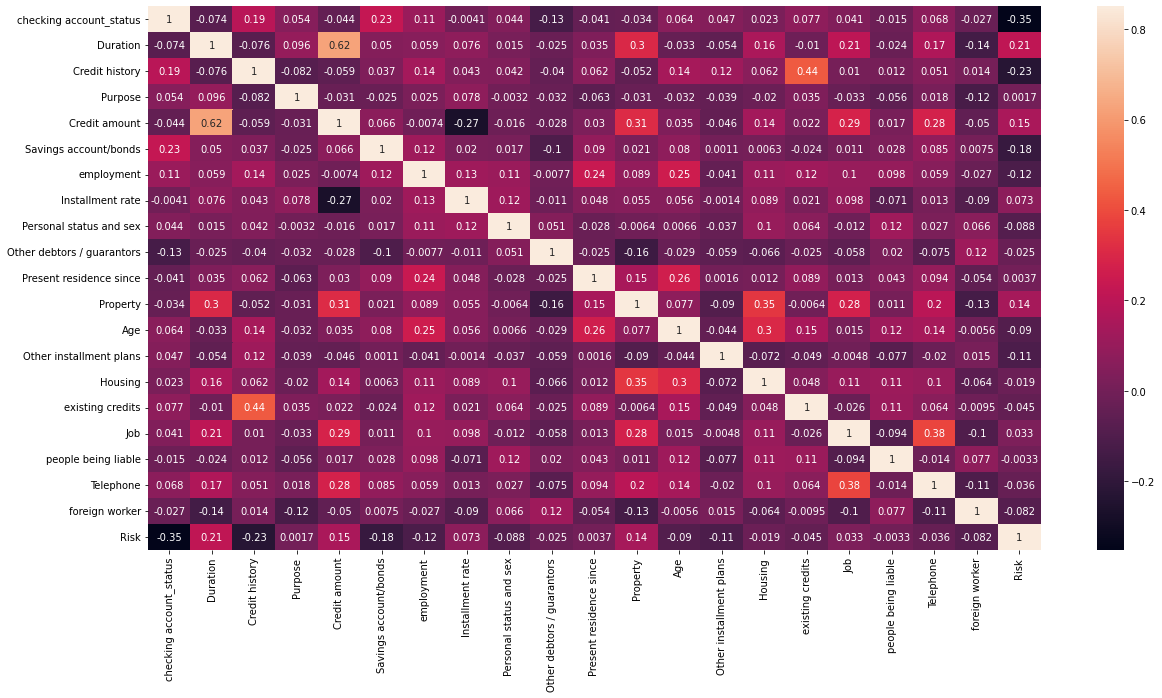

In [ ]:
fig = plt.figure(figsize =(20, 10))

_ = sns.heatmap(df.corr(), annot = True, vmax = 0.85) 

From the above matrix we can see that 'Age', 'Personal status and sex' ,'foreign worker' ,'Installment rate'  ,'existing credits', 'Telephone', 'Job' ,'Other debtors / guarantors' ,'Housing', 'Present residence since' ,'people being liable' ,'Purpose' have very low correlation with Target column 'Risk'.  So we can drop them

In [12]:
df_clean = df.drop(['Age', 'Personal status and sex' ,'foreign worker' ,
          'Installment rate'  ,'existing credits', 'Telephone',
          'Job' ,'Other debtors / guarantors' ,'Housing',
          'Present residence since' ,'people being liable' ,'Purpose'   ],
                          axis=1)
                

In [13]:
df_clean.head()

,checking account_status,Duration,Credit history,Credit amount,Savings account/bonds,employment,Property,Other installment plans,Risk
0,1,48,2,5951,0,2,0,2,1
1,3,12,4,2096,0,3,0,2,0
2,0,42,2,7882,0,3,1,2,0
3,0,24,3,4870,0,2,3,2,1
4,3,36,2,9055,4,2,3,2,0


In [14]:
df_clean.shape

(999, 9)

After data reduction, we have 9 columns in our dataset. 

### Data Visualization

#### Finding the relation between Checking Account Status and Risk

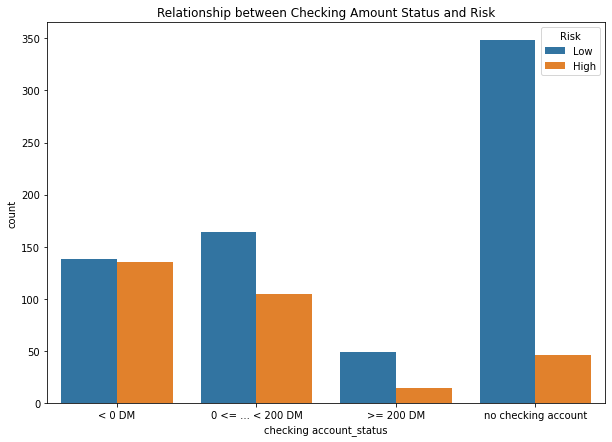

In [15]:
fig = plt.figure(figsize =(10, 7))
g = sns.countplot(data=df_clean, x="checking account_status", hue = "Risk" );
g.set_xticklabels(['< 0 DM', '0 <= ... < 200 DM', '>= 200 DM','no checking account']);                                               
plt.legend(title='Risk',  labels=['Low', 'High']); 
_ = plt.title('Relationship between Checking Amount Status and Risk')

*   From the above graph we can see that those who have no checking account have Low Credit Risk.
*   That is, negative correlation with Risk column.



#### Finding relation between Risk and Duration (in months)

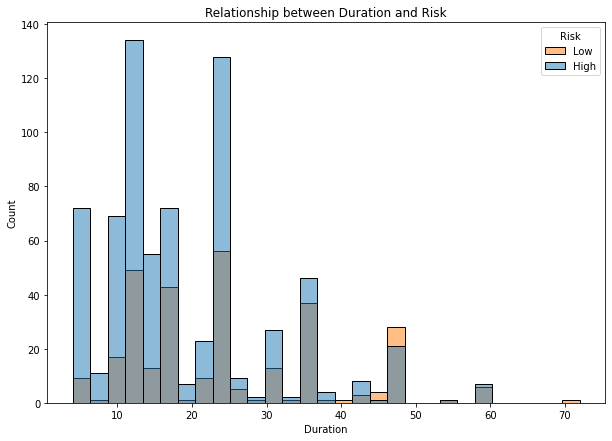

In [16]:
fig = plt.figure(figsize =(10, 7))
_ = sns.histplot(data = df_clean, x = 'Duration', hue="Risk")
plt.legend(title='Risk',  labels=['Low','High']); 
_ = plt.title('Relationship between Duration and Risk')

*   As seen from histogram, there isn't a perfect relationship between duration and risk.
*   However we can see that samples are more towards lower Duration than higher.

#### Finding relationship between Credit amount and Risk

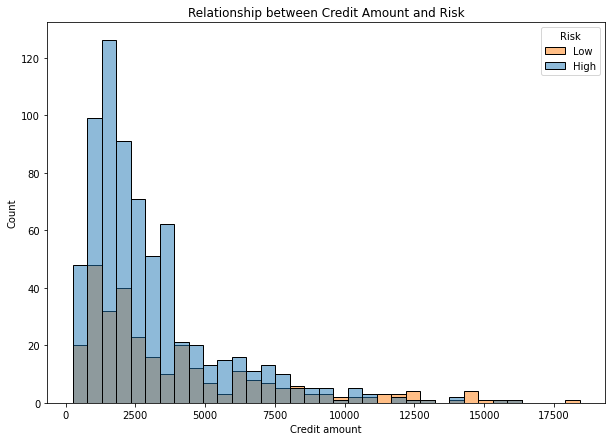

In [17]:
fig = plt.figure(figsize =(10, 7))
_ = sns.histplot(data = df_clean, x = 'Credit amount', hue="Risk")
plt.legend(title='Risk',  labels=['Low','High']); 
_ = plt.title('Relationship between Credit Amount and Risk')

*   Most the the samples have credit amount in the range of 1000 to 3000.
*   Also, credit risk is high in the range of 1500 and 2500. 



#### Finding relationship between Credit History and Risk

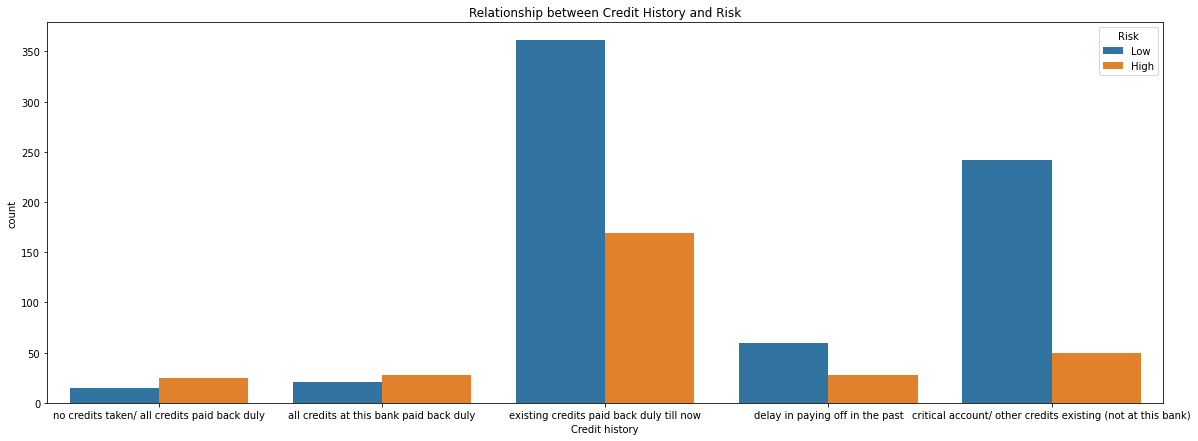

In [18]:
fig = plt.figure(figsize =(20, 7))
g = sns.countplot(data=df_clean, x="Credit history", hue = "Risk" );
g.set_xticklabels(['no credits taken/ all credits paid back duly',
'all credits at this bank paid back duly',
'existing credits paid back duly till now',
'delay in paying off in the past',
'critical account/ other credits existing (not at this bank)']); 

plt.legend(title='Risk',  labels=['Low', 'High']); 
_ = plt.title('Relationship between Credit History and Risk')

We can see that those who have paid existing credits duly till now have a lower credit risk which is as expected. 

#### Relationship between Duration and Credit Amount

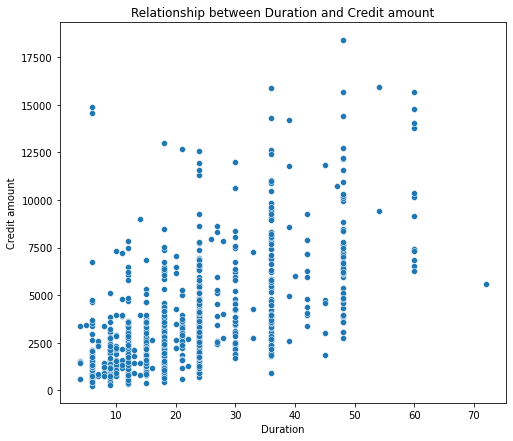

In [19]:
fig = plt.figure(figsize =(8, 7))
g = sns.scatterplot(data = df_clean, x ='Duration', y = 'Credit amount')
_ = plt.title('Relationship between Duration and Credit amount')

From the scatterplot we can see that Duration and Credit Amount have correlation with each other. As duration increases, credit amount also increses.

#### Countplot to find number of samples

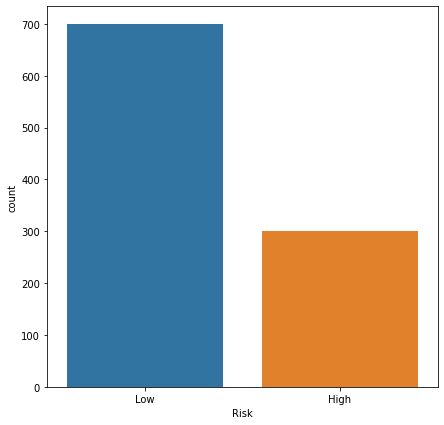

In [20]:
fig = plt.figure(figsize =(7, 7))
g = sns.countplot(data=df_clean, x="Risk");
g.set_xticklabels(['Low', 'High']); 

From the above count plot we can see the 70% of the samples are from class Low risk whereas 30% of the samples are from class High Risk

### Data Encoding

In [22]:
df_pre = df_clean.copy()

Splitting the data into Train and test for model training. 80% training data and 20% testing data

In [24]:
y = df_pre["Risk"] 
X = df_pre.drop(["Risk"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 70)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((799, 8), (799,), (200, 8), (200,))

Since we have categorical columns, we need to label Encode them so that they can be used in the model

In [27]:
le = preprocessing.LabelEncoder()
for col in ['checking account_status','Credit history',
       'Savings account/bonds', 'employment',
        'Property','Other installment plans']:                                                      

    trained_le = le.fit(X_train[col])
    X_train[col] = trained_le.transform(X_train[col])                           
    X_test[col] = trained_le.transform(X_test[col])

train_le = le.fit(y_train)
y_train = train_le.transform(y_train)
y_test = train_le.transform(y_test)

In [28]:
X_train

,checking account_status,Duration,Credit history,Credit amount,Savings account/bonds,employment,Property,Other installment plans
401,3,24,3,8648,0,1,2,0
223,3,15,2,4657,0,2,2,2
570,3,30,4,5954,0,3,2,2
860,3,18,3,2169,0,2,2,2
941,3,24,2,929,4,3,2,1
...,...,...,...,...,...,...,...,...
316,1,24,2,4351,4,2,1,2
792,2,24,2,2892,0,4,3,2
114,3,48,4,3578,4,4,0,2
214,1,6,4,932,4,3,1,2


As above, all columns have been label encoded and hence can be used in our Logistic Regression Model.

### Model Training

Initializing Logistic Regression Model

In [29]:
logisticRegr = LogisticRegression(max_iter=10000)     

Fitting the Baseline Model

In [ ]:
logisticRegr.fit(X_train, y_train)     

LogisticRegression(max_iter=10000)

## Model Evaluation
Let's check our model performance (accuracy) on both Training and Testing Dataset. 

In [ ]:
print(f'Accuracy on Training data: {logisticRegr.score(X_train, y_train) * 100} %')

Accuracy on Training data: 74.09261576971214 %


In [ ]:
print(f'Accuracy on Test Data: {logisticRegr.score(X_test, y_test) * 100} %')

Accuracy on Test Data: 80.0 %


In [ ]:
from sklearn.metrics import classification_report
y_pred_LRC = logisticRegr.predict(X_test)
print(classification_report(y_test, y_pred_LRC))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       156
           1       0.56      0.41      0.47        44

    accuracy                           0.80       200
   macro avg       0.70      0.66      0.68       200
weighted avg       0.78      0.80      0.79       200



Here we can see that Accuracy of the Baseline Model is 80% on Testing Data. We can improve the model performance by tunning the hyperparameters of the model

### Model Tuning using Grid Search CV

In [ ]:
grid = [
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['lbfgs','newton-cg', 'sag']}
 ]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
print(f"Best Params: {grid_result.best_params_}")

Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


#### Using the Best Params obtained from Grid Search CV to Train the Model

In [ ]:
logisticRegr = LogisticRegression(C= 0.1, penalty ='l2', solver = 'newton-cg') 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 67)

In [ ]:
logisticRegr.fit(X_train, y_train)    

LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
print(f'Accuracy on Test data after tuning: {round(logisticRegr.score(X_test, y_test), 4) *100} %')

Accuracy on Test data after tuning: 81.5 %


Accuracy of 81.5% is obtained on Testing Data after tuning the model which is an improvment as compared to original model having 80% testing accuracy. 

In [ ]:
results = pd.DataFrame({'Actual Credit Risk': y_test, 'Predicted Credit Score': lr_probs})
results.tail()

,Actual Credit Risk,Predicted Credit Score
195,0,0.547890
196,0,0.033832
197,0,0.069422
198,1,0.426267
199,0,0.131714


#### Plotting the ROC Curve for the Tuned Model

Text(0.5, 0, 'False Positive Rate')

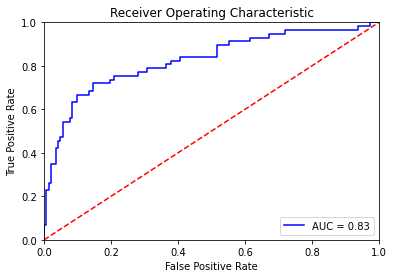

In [ ]:
lr_probs = logisticRegr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

fpr, tpr, threshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We see that we have obtained an AUC score of 0.83 on testing data.

## Conclusion



1.   The credit risk is dependent upon parameters such as checking account status, duration, credit amount and credit history.
2.    Also, those who have paid existing credits duly till now (credit history) have a lower credit risk.
3.   Credit risk is high if credit amount is high.
4. Moreover, as the credit amount increases, the duration also increses.  

